# SMI Ergodic Indicator 

https://phemex.com/academy/what-is-smi-ergodic-indicator

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2019-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02 00:00:00-05:00,38.722500,39.712502,38.557499,39.480000,38.047047,148158800
2019-01-03 00:00:00-05:00,35.994999,36.430000,35.500000,35.547501,34.257278,365248800
2019-01-04 00:00:00-05:00,36.132500,37.137501,35.950001,37.064999,35.719692,234428400
2019-01-07 00:00:00-05:00,37.174999,37.207500,36.474998,36.982498,35.640202,219111200
2019-01-08 00:00:00-05:00,37.389999,37.955002,37.130001,37.687500,36.319611,164101200


In [3]:
df.index = pd.Index(df.index.date, name="Date")

In [4]:
n = 14 # Number of Periods
highest_high = df['High'].rolling(n).max()
lowest_low = df['Low'].rolling(n).min()
mid_price = (highest_high + lowest_low) / 2
price_change = df['Adj Close'] - df['Close'].shift(1)
volatility = price_change.abs().rolling(n).sum()
r = price_change / volatility
ema1 = r.ewm(span=10, min_periods=0, adjust=False).mean()
ema2 = ema1.ewm(span=10, min_periods=0, adjust=False).mean()
df['SMI_Ergodic'] = (ema1 + ema2) * mid_price / df['Adj Close']
df['SMI_Ergodic_Signal'] = df['SMI_Ergodic'].rolling(3).mean()

In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMI_Ergodic,SMI_Ergodic_Signal
Date,,,,,,,,
2019-01-25,38.869999,39.532501,38.580002,39.439999,38.008492,134142000,-0.117312,-0.123593
2019-01-28,38.947498,39.082500,38.415001,39.075001,37.656742,104768400,-0.128645,-0.125934
2019-01-29,39.062500,39.532501,38.527500,38.669998,37.266449,166348800,-0.138101,-0.128020
2019-01-30,40.812500,41.537498,40.057499,41.312500,39.813030,244439200,-0.106159,-0.124302
2019-01-31,41.527500,42.250000,41.139999,41.610001,40.099739,162958400,-0.107606,-0.117289


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,SMI_Ergodic,SMI_Ergodic_Signal
Date,,,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517105,48478800,-0.136144,-0.134598
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896339,93121200,-0.123405,-0.129603
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869431,146266000,-0.131208,-0.130252
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290047,144114400,-0.132720,-0.129111
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810936,100805600,-0.132775,-0.132235


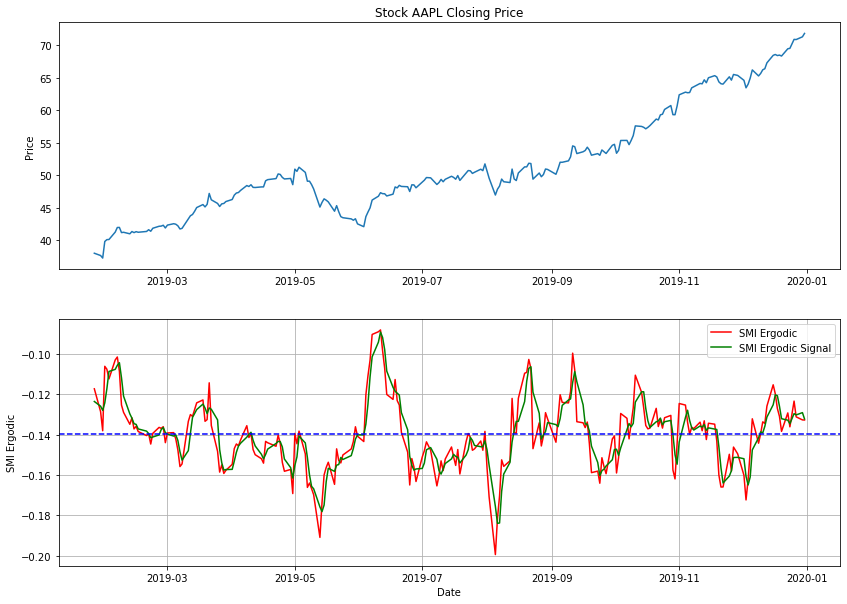

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['SMI_Ergodic'], label='SMI Ergodic', color='red')
ax2.plot(df['SMI_Ergodic_Signal'], label='SMI Ergodic Signal', color='green')
ax2.axhline(y=df['SMI_Ergodic'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('SMI Ergodic')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with SMI Ergodic

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMI_Ergodic,SMI_Ergodic_Signal,VolumePositive
0,737084.0,38.869999,39.532501,38.580002,39.439999,38.008492,134142000,-0.117312,-0.123593,False
1,737087.0,38.947498,39.082500,38.415001,39.075001,37.656742,104768400,-0.128645,-0.125934,False
2,737088.0,39.062500,39.532501,38.527500,38.669998,37.266449,166348800,-0.138101,-0.128020,False
3,737089.0,40.812500,41.537498,40.057499,41.312500,39.813030,244439200,-0.106159,-0.124302,False
4,737090.0,41.527500,42.250000,41.139999,41.610001,40.099739,162958400,-0.107606,-0.117289,False


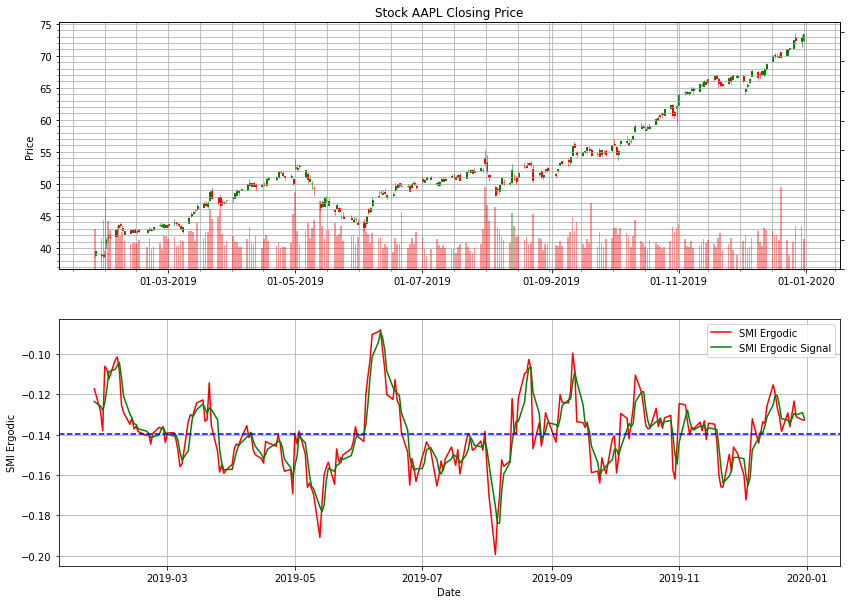

In [9]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['SMI_Ergodic'], label='SMI Ergodic', color='red')
ax2.plot(df['SMI_Ergodic_Signal'], label='SMI Ergodic Signal', color='green')
ax2.axhline(y=df['SMI_Ergodic'].mean(), color='blue', linestyle='--')
ax2.grid()
ax2.set_ylabel('SMI Ergodic')
ax2.set_xlabel('Date')
ax2.legend(loc='best')